In [1]:
# import statements
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K

from keras.datasets import cifar10
from keras.datasets import mnist

from quiver_engine import server
from matplotlib.pyplot import imshow

import tensorflow as tf

Using TensorFlow backend.


## Keras

### Data import

In [2]:
# load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

170500096/170498071 [==============================] - 54s 0us/step


In [3]:
# normalize the data
x_train, x_test = x_train/255., x_test/255.

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

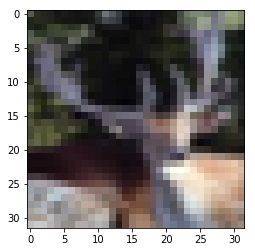

In [5]:
# check an image
imshow(x_train[563])

### Model definition

**Data Augmentation**

In [6]:
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(x_train)

# # fits the model on batches with real-time data augmentation:
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=20)

**Initializers**

In [7]:
w_init = keras.initializers.glorot_normal()
b_init = keras.initializers.zeros()
w_dense_init = keras.initializers.random_normal()

**Optimizer and Callbacks**

In [8]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_categorical_accuracy", mode="auto")

**Model**

In [9]:
model = Sequential([
    Conv2D(filters=32, input_shape=(32, 32, 3), 
           kernel_size=(5,5), strides=(1,1), padding="same", use_bias=True,
           kernel_initializer=w_init, bias_initializer=b_init, activation="relu", name="Conv_1"),
    MaxPool2D(pool_size=(2,2), strides=(2,2), name="Pool_1", padding="same"),

    Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding="same", use_bias=True,
           kernel_initializer=w_init, bias_initializer=b_init, activation="relu", name="Conv_2"), 
    MaxPool2D(pool_size=(2,2), strides=(2,2), name="Pool_2", padding="same"),
    
    Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding="same", use_bias=True,
           kernel_initializer=w_init, bias_initializer=b_init, activation="relu", name="Conv_3"), 
    MaxPool2D(pool_size=(2,2), strides=(2,2), name="Pool_3", padding="same"),
    
    Flatten(),
    
    Dense(units=512, use_bias=True, kernel_initializer=w_dense_init, bias_initializer=b_init,
         activation="relu", name="Dense_2"),
    
    Dropout(rate=0.5),
    
    Dense(units=10, use_bias=True, kernel_initializer=w_dense_init, bias_initializer=b_init,
         activation="softmax", name="Dense_3")
])

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

**Training**

In [10]:
model.fit(x=x_train, y=y_train, epochs=20, batch_size=32, validation_split=.15, callbacks=[early_stopping])

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 [==============================] - 190s 4ms/step - loss: 1.5983 - categorical_accuracy: 0.4113 - val_loss: 1.2256 - val_categorical_accuracy: 0.5561
Epoch 2/20
42500/42500 [==============================] - 197s 5ms/step - loss: 1.1740 - categorical_accuracy: 0.5821 - val_loss: 1.0352 - val_categorical_accuracy: 0.6357
Epoch 3/20
42500/42500 [==============================] - 195s 5ms/step - loss: 0.9885 - categorical_accuracy: 0.6517 - val_loss: 0.9851 - val_categorical_accuracy: 0.6584
Epoch 4/20
42500/42500 [==============================] - 195s 5ms/step - loss: 0.8660 - categorical_accuracy: 0.6957 - val_loss: 0.8917 - val_categorical_accuracy: 0.6952
Epoch 5/20
42500/42500 [==============================] - 211s 5ms/step - loss: 0.7626 - categorical_accuracy: 0.7311 - val_loss: 0.9096 - val_categorical_accuracy: 0.6927


**Evaluation**

In [11]:
model.evaluate(x=x_test, y=y_test)

10000/10000 [==============================] - 13s 1ms/step


[0.9358472061157227, 0.68089999999999995]

In [ ]:
server.launch(model=model, input_folder="./img")